# Aula 2 - Matplotlib

### Atividade

Instruções
- Resolver as questões abaixo. Subir o notebook em um repositório público no GitHub e enviar no [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform)
- Para resolver as questões abaixo utilizar o dataset do seaborn: 'mpg'
- Para os gráficos finais de cada questão, eles devem possuir título, rótulo dos eixos definidos e legenda (quando necessário).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# importa dataset
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### Questão 1

Verificar se a base de dados possui valores nulos. Para as linhas com valores nulos, deletar as mesmas. Ao final da questão verificar se a base de dados ficou com 392 registros e 9 colunas.

In [10]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


A coluna horsepower possui valores nulos.

In [14]:
df_mpg = df_mpg.dropna().reset_index()
df_mpg.info() #df_mpg.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    object 
 9   name          392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.8+ KB


O dataframe possui 392 linhas e 9 colunas.

#### Questão 2

Qual a quantidade de carros por origem (*origin*)? Responda utilizando um gráfico de barras e inclua os rótulos dos dados.

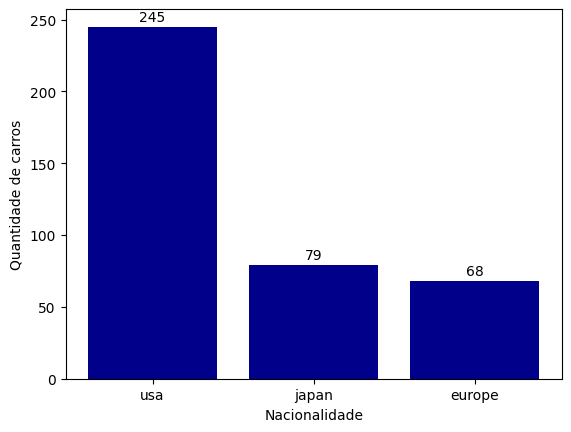

In [18]:
# Extraindo valores
x_bar_carros = df_mpg['origin'].value_counts().index
y_bar_carros = df_mpg['origin'].value_counts().values

fig, ax = plt.subplots()

# Adicionando rótulos
bars = ax.bar(x_bar_carros, y_bar_carros, color='darkblue')
ax.bar_label(bars, padding=2)

# Nomeando os eixos
plt.xlabel('Nacionalidade')
plt.ylabel('Quantidade de carros')
plt.show()

#### Questão 3

Qual a média da potência (*horsepower*) dos carros por origem?

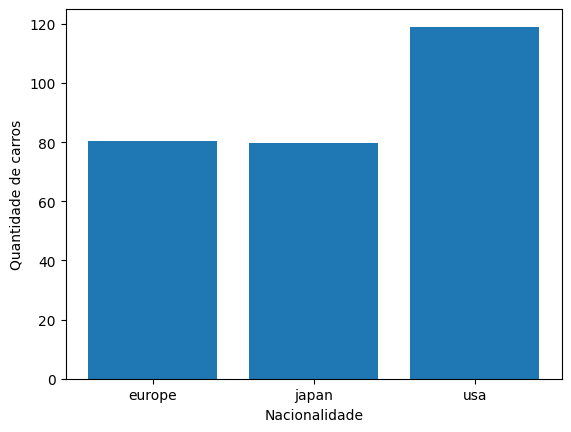

In [42]:
x = df_mpg.groupby('origin')['horsepower'].mean().reset_index()['origin']
y = df_mpg.groupby('origin')['horsepower'].mean().reset_index()['horsepower']

plt.bar(x, y)
plt.xlabel('Nacionalidade')
plt.ylabel('Quantidade de carros')
plt.show()

#### Questão 4

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros?

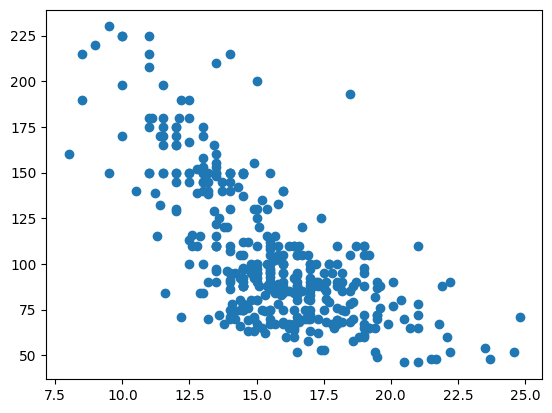

In [46]:
plt.scatter(data=df_mpg, x='acceleration', y='horsepower')
plt.show()

#### Questão 5

Qual a correlacão da potência (*horsepower*) com a aceleração (*acceleration*) dos carros, segmentando de acordo com a origem (*origin*) com cores diferentes e plotando no mesmo eixo (*axes*)?

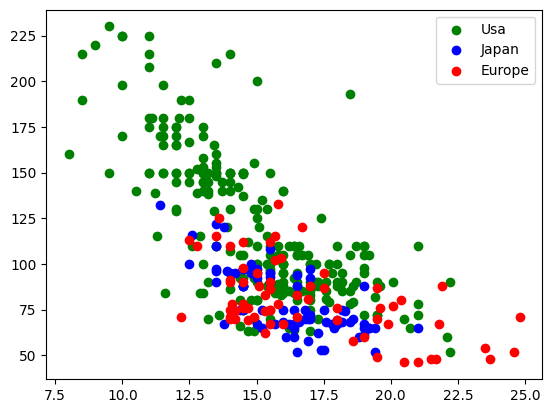

In [48]:
plt.scatter(data=df_mpg[df_mpg['origin']=='usa'], 
            x='acceleration', y='horsepower', c='green', label='Usa')
plt.scatter(data=df_mpg[df_mpg['origin']=='japan'], 
            x='acceleration', y='horsepower', c='blue', label='Japan')
plt.scatter(data=df_mpg[df_mpg['origin']=='europe'], 
            x='acceleration', y='horsepower', c='red', label='Europe')

plt.legend()
plt.show()